# Dashboard - Data Processing

## Name: Rohit Dev
## Matrikel- Nr.- 411817

## Libraries Import

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
from datetime import datetime

In [2]:
%matplotlib inline
sns.set_style("dark")
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

## Covid-Data imported from 'Our World in Data (OWID)' as csv file
https://covid.ourworldindata.org/data/owid-covid-data.csv

In [3]:
# Reading the raw data from 'csv file' 
data_raw = pd.read_csv('../data/raw/owid-covid-data.csv')

In [4]:
data_raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204535,ZWE,Africa,Zimbabwe,2022-07-23,256246.0,29.0,23.286,5572.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
204536,ZWE,Africa,Zimbabwe,2022-07-24,256254.0,8.0,24.429,5572.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
204537,ZWE,Africa,Zimbabwe,2022-07-25,256270.0,16.0,26.714,5572.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
204538,ZWE,Africa,Zimbabwe,2022-07-26,256284.0,14.0,13.857,5574.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
data_raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# Required data
data_required = data_raw[['date', 'location','total_cases']]

In [7]:
data_required.tail()

,date,location,total_cases
204535,2022-07-23,Zimbabwe,256246.0
204536,2022-07-24,Zimbabwe,256254.0
204537,2022-07-25,Zimbabwe,256270.0
204538,2022-07-26,Zimbabwe,256284.0
204539,2022-07-27,Zimbabwe,256315.0


In [8]:
# Changing the column names
data_required = data_required.rename(columns={'location':'country', 'total_cases':'corona_cases'})

In [9]:
data_required.head()

,date,country,corona_cases
0,2020-02-24,Afghanistan,5.0
1,2020-02-25,Afghanistan,5.0
2,2020-02-26,Afghanistan,5.0
3,2020-02-27,Afghanistan,5.0
4,2020-02-28,Afghanistan,5.0


In [10]:
# Changing date data format
date = data_required['date'][0]
type(date)

str

In [11]:
date_idx = [datetime.strptime(each, '%Y-%m-%d') for each in data_required.date]

In [12]:
data_required['date'] = date_idx

In [13]:
data_required.head()

,date,country,corona_cases
0,2020-02-24,Afghanistan,5.0
1,2020-02-25,Afghanistan,5.0
2,2020-02-26,Afghanistan,5.0
3,2020-02-27,Afghanistan,5.0
4,2020-02-28,Afghanistan,5.0


In [14]:
# Display data types of columns
data_required.dtypes

date            datetime64[ns]
country                 object
corona_cases           float64
dtype: object

In [15]:
# Display countries list
data_required['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [16]:
data_swd = data_required[data_required['country'] == 'Sweden']
data_swd.tail()

,date,country,corona_cases
177123,2022-07-23,Sweden,2533978.0
177124,2022-07-24,Sweden,2533978.0
177125,2022-07-25,Sweden,2533978.0
177126,2022-07-26,Sweden,2533978.0
177127,2022-07-27,Sweden,2533978.0


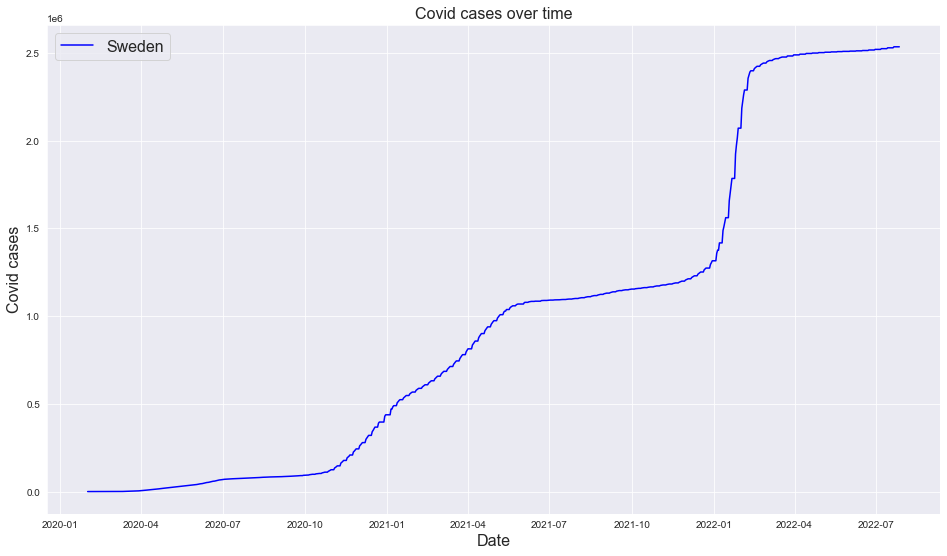

In [17]:
# Plot of the covid cases in Sweden over time
fig, ax1 = plt.subplots(1,1)
ax1.plot(data_swd['date'], (data_swd['corona_cases']), label='Sweden', color = 'b')

ax1.set_yscale('linear')

ax1.set_title('Covid cases over time', size = 16)
ax1.set_xlabel('Date', size = 16)
ax1.set_ylabel('Covid cases', size = 16)

ax1.legend(loc='best', prop={'size':16})

plt.grid()

## Analysis of multiple countries

In [18]:
# Creating the dataframe with date as index
total_dates = pd.DataFrame(data_required['date'])

In [19]:
dates_unique = total_dates['date'].unique()

In [20]:
# Number of unique dates
len(dates_unique)

939

In [21]:
df_dates = pd.DataFrame(dates_unique)

In [22]:
df_dates.rename(columns={0:'date'}, inplace=True)   # Renames the columns and save to df_dates

In [23]:
df_dates.sort_values(by='date', inplace=True)

In [24]:
data_analysis = df_dates.set_index(['date'])

In [25]:
country_list = ['India', 'Germany', 'Spain']

In [26]:
country_list = data_required['country'].unique()

In [27]:
# Number of unique countries
len(country_list)

244

# Data Processing for Dashboard

In [28]:
# Recall raw data
data_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Doubling Rate

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

In [30]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [31]:
# Calculating doubling rate
pd_DR_result=data_raw[['location','total_cases']].groupby(['location']).apply(rolling_reg,'total_cases').reset_index()

In [32]:
pd_DR_result.tail()

,location,level_1,total_cases
204535,Zimbabwe,204535,17670.804598
204536,Zimbabwe,204536,13850.756757
204537,Zimbabwe,204537,21354.722222
204538,Zimbabwe,204538,17084.622222
204539,Zimbabwe,204539,11390.651852


In [33]:
# Changing name of the columns
pd_DR_result=pd_DR_result.rename(columns={'total_cases':'confirmed_DR',
                             'level_1':'index', 'location':'country'})
pd_DR_result

,country,index,confirmed_DR
0,Afghanistan,0,NaN
1,Afghanistan,1,NaN
2,Afghanistan,2,inf
3,Afghanistan,3,inf
4,Afghanistan,4,inf
...,...,...,...
204535,Zimbabwe,204535,1.767080e+04
204536,Zimbabwe,204536,1.385076e+04
204537,Zimbabwe,204537,2.135472e+04
204538,Zimbabwe,204538,1.708462e+04


In [34]:
# Data Frame for the confirmed covid cases only
data_required=data_required.reset_index()

In [35]:
data_required = data_required.rename(columns={'corona_cases':'confirmed'})
data_required.head()

,index,date,country,confirmed
0,0,2020-02-24,Afghanistan,5.0
1,1,2020-02-25,Afghanistan,5.0
2,2,2020-02-26,Afghanistan,5.0
3,3,2020-02-27,Afghanistan,5.0
4,4,2020-02-28,Afghanistan,5.0


In [36]:
pd_DR_result.head()

,country,index,confirmed_DR
0,Afghanistan,0,NaN
1,Afghanistan,1,NaN
2,Afghanistan,2,inf
3,Afghanistan,3,inf
4,Afghanistan,4,inf


In [37]:
# Merging the data frames: confirmed covid cases dataframe & doubling rate dataframe
pd_result_larg=pd.merge(data_required,pd_DR_result[['index','confirmed_DR']],on=['index'], how='left')

In [38]:
pd_result_larg

,index,date,country,confirmed,confirmed_DR
0,0,2020-02-24,Afghanistan,5.0,NaN
1,1,2020-02-25,Afghanistan,5.0,NaN
2,2,2020-02-26,Afghanistan,5.0,inf
3,3,2020-02-27,Afghanistan,5.0,inf
4,4,2020-02-28,Afghanistan,5.0,inf
...,...,...,...,...,...
204535,204535,2022-07-23,Zimbabwe,256246.0,1.767080e+04
204536,204536,2022-07-24,Zimbabwe,256254.0,1.385076e+04
204537,204537,2022-07-25,Zimbabwe,256270.0,2.135472e+04
204538,204538,2022-07-26,Zimbabwe,256284.0,1.708462e+04


In [39]:
pd_result_larg.head()

,index,date,country,confirmed,confirmed_DR
0,0,2020-02-24,Afghanistan,5.0,NaN
1,1,2020-02-25,Afghanistan,5.0,NaN
2,2,2020-02-26,Afghanistan,5.0,inf
3,3,2020-02-27,Afghanistan,5.0,inf
4,4,2020-02-28,Afghanistan,5.0,inf


## Filtering the data with groupby apply

In [40]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [41]:
data_required.tail()

,index,date,country,confirmed
204535,204535,2022-07-23,Zimbabwe,256246.0
204536,204536,2022-07-24,Zimbabwe,256254.0
204537,204537,2022-07-25,Zimbabwe,256270.0
204538,204538,2022-07-26,Zimbabwe,256284.0
204539,204539,2022-07-27,Zimbabwe,256315.0


In [42]:
data_required["state"]="none"

In [43]:
data_required.dtypes

index                 int64
date         datetime64[ns]
country              object
confirmed           float64
state                object
dtype: object

In [44]:
# Data Type change of Column 'confirmed' from float64 to int64...this has been done to run 'Savitzky–Golay filter' function

data_required[data_required['confirmed'].isnull()]
data_required['confirmed'] = pd.to_numeric(data_required['confirmed'], errors='coerce')
data_required = data_required.dropna(subset=['confirmed'])
data_required['confirmed'] = data_required['confirmed'].apply(np.int64)
data_required.dtypes

index                 int64
date         datetime64[ns]
country              object
confirmed             int64
state                object
dtype: object

## Filtered confirmed covid cases

In [45]:
pd_filtered_result=data_required[['country','confirmed']].groupby(['country']).apply(savgol_filter).reset_index()

In [46]:
# Merging the filtered confired covid cases
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-02-24,Afghanistan,5.0,NaN,5.0
1,1,2020-02-25,Afghanistan,5.0,NaN,5.0
2,2,2020-02-26,Afghanistan,5.0,inf,5.0
3,3,2020-02-27,Afghanistan,5.0,inf,5.0
4,4,2020-02-28,Afghanistan,5.0,inf,5.0


## Filtered doubling rate

In [47]:
pd_filtered_doubling=pd_result_larg[['country','confirmed_filtered']].groupby(['country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_1':'index'})

In [48]:
pd_filtered_doubling.tail()

,country,index,confirmed_filtered_DR
204535,Zimbabwe,204535,17081.684444
204536,Zimbabwe,204536,17082.648889
204537,Zimbabwe,204537,15530.682828
204538,Zimbabwe,204538,14080.926740
204539,Zimbabwe,204539,15255.392857


In [49]:
# Merging the final filetered doubling rate 
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
204535,204535,2022-07-23,Zimbabwe,256246.0,17670.804598,256240.8,17081.684444
204536,204536,2022-07-24,Zimbabwe,256254.0,13850.756757,256254.2,17082.648889
204537,204537,2022-07-25,Zimbabwe,256270.0,21354.722222,256273.8,15530.682828
204538,204538,2022-07-26,Zimbabwe,256284.0,17084.622222,256290.6,14080.926740
204539,204539,2022-07-27,Zimbabwe,256315.0,11390.651852,256307.4,15255.392857


In [50]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN) 


In [51]:
# Exporting the processed data file
pd_result_larg.to_csv('../data/processed/Dashboard_final_set.csv',sep=';',index=False)

# End